# Predicting Stress Level from Sleep Data Using Logistic Regression


In this notebook, we apply a machine learning model to classify stress level categories based on university students' sleep patterns.
We will use **Logistic Regression** to predict whether a student's stress level is Low, Medium, or High using sleep-related features such as sleep duration and quality, caffeine intake, screen time, and physical activity.


## 1. Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("processed_google_forms.csv")
df.head()


Saving processed_google_forms.csv to processed_google_forms.csv


,age,gender,sleep_hours,bedtime_consistency,bedtime,wake_time,stress_level,anxiety_level,efficiency_level,sleep_difficulty,bedtime_hour,wake_hour,sleep_bucket,stress_level_norm,anxiety_level_norm,efficiency_level_norm,sleep_difficulty_score
0,23,Female,6-8 hours,Not consistent,0,9,8,8,6,Yes,0,9,Normal,0.8,0.8,0.6,1.0
1,19,Female,more than 8 hours,Very consistent,0,10,4,5,5,No,0,10,Long,0.4,0.5,0.5,0.0
2,20,Female,4-6 hours,Not consistent,2,11,7,7,5,No,2,11,Very Short,0.7,0.7,0.5,0.0
3,20,Female,6-8 hours,Somewhat consistent,0,9,4,5,10,No,0,9,Normal,0.4,0.5,1.0,0.0
4,21,Female,6-8 hours,Somewhat consistent,1,8,8,8,6,No,1,8,Normal,0.8,0.8,0.6,0.0


## 2. Categorize Stress Level

In [ ]:

def categorize_stress(level):
    if level <= 3:
        return "Low"
    elif level <= 6:
        return "Medium"
    else:
        return "High"

df["stress_category"] = df["stress_level"].apply(categorize_stress)
df["stress_category"].value_counts()


,count
stress_category,
High,18
Medium,8
Low,3


## 3. Feature Selection and Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


X = df[[
    "anxiety_level",
    "efficiency_level",
    "sleep_difficulty_score",
    "bedtime_hour",
    "wake_hour"
]]


def categorize_stress(level):
    if level <= 3:
        return "Low"
    elif level <= 6:
        return "Medium"
    else:
        return "High"

df["stress_category"] = df["stress_level"].apply(categorize_stress)
y = df["stress_category"]


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 4. Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

## 5. Evaluation

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       1.00      0.29      0.44         7
         Low       0.00      0.00      0.00         1
      Medium       0.14      1.00      0.25         1

    accuracy                           0.33         9
   macro avg       0.38      0.43      0.23         9
weighted avg       0.79      0.33      0.37         9



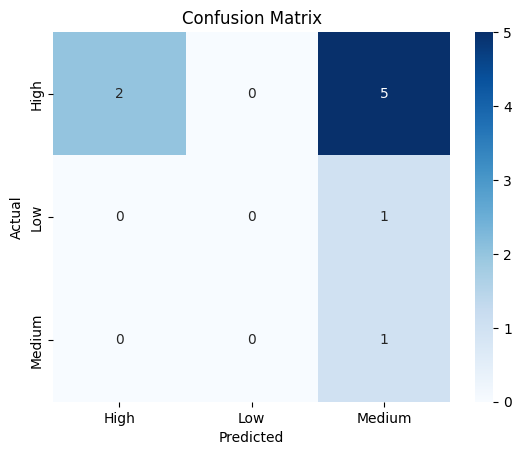

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 6. Conclusion and Insights


Logistic Regression provides a basic but interpretable way to model categorical stress levels using sleep-related features.
While the model might not be highly accurate due to limited or noisy data, it serves as a good starting point to explore the connection between sleep and well-being of college students.
Future models can explore tree-based methods or neural networks for improved performance.
